In [17]:
import numpy as np
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (3.0, 3.0) # 显示大小

#### Tool functions: load and save images

In [18]:
def load_image(path):
    """load image, NOTE that opencv loads image in BGR, we convert it to RGB
    Args:
        path (str): image path
    Returns:
        img (np.ndarray)
    """
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def save_image(img, save_path):
    """save image
    Args:
        img (np.ndarray or PIL.Image.Image): image to save
        save_path (str): save path
    """
    save_dir = os.path.dirname(save_path)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    if not save_path.endswith('.jpg'):
        save_path = save_path + '.jpg'
    if type(img) == np.ndarray:
        img_PIL = Image.fromarray(img, mode='RGB')
    img_PIL.save(save_path, 'JPEG')

In [19]:
test_img = load_image('./color/sunset.jpg')

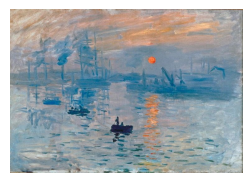

In [20]:
plt.axis('off') # 不显示坐标轴
plt.imshow(test_img)

#### Trivial Ideas to convert RGB to grayscale

In [21]:
# Method 1 Average
# Trivial method, average the three channels
def rgb2gray_1(img):
    """convert color image to grey image
    Args:
        img (np.ndarray): color image
    Returns:
        grey_img (np.ndarray): grey image
    """
    grey_img = np.mean(img, axis=2)
    return grey_img

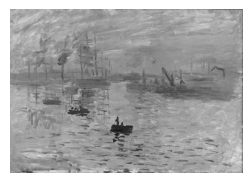

In [22]:
plt.axis('off') # 不显示坐标轴
plt.imshow(rgb2gray_1(test_img), cmap='gray')

In [45]:
# Method 2 Luminosity, PPT reference https://www.rapidtables.com/convert/image/rgb-to-grayscale.html
# The luminosity method takes into account the fact that 
# human eyes are more sensitive to green than to other colors. 
# It computes the gray value as a weighted sum of the red, green, 
# and blue values, with the weights corresponding to the 
# 0.
def rgb2gray_2(img):
    """convert color image to gray image
    Args:
        img (np.ndarray): color image
    Returns:
        grey_img (np.ndarray): grey image
    """
    grey_img = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    return grey_img

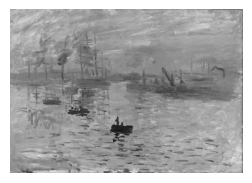

In [46]:
plt.axis('off') # 不显示坐标轴
plt.imshow(rgb2gray_2(test_img), cmap='gray')

In [25]:
# Method 3 Opencv's method
def rgb2gray_3(img):
    """convert color image to gray image
    Args:
        img (np.ndarray): color image
    Returns:
        grey_img (np.ndarray): grey image
    """
    grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return grey_img

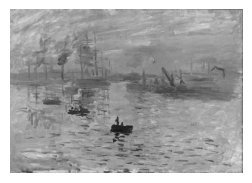

In [47]:
plt.axis('off') # 不显示坐标轴
plt.imshow(rgb2gray_3(test_img), cmap='gray')

#### Improved Ideas to convert RGB to grayscale

In [27]:
# Method 4 perform PCA on the last channel, 3 -> 1
def rgb2gray_4(img):
    """convert color image to gray image
    Args:
        img (np.ndarray): color image
    Returns:
        grey_img (np.ndarray): grey image
    """
    H, W, C = img.shape
    img = img.reshape(-1, 3)
    img = img - np.mean(img, axis=0)
    cov = np.cov(img, rowvar=False)
    eig_val, eig_vec = np.linalg.eig(cov)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:, idx]
    grey_img = np.dot(img, eig_vec[:, 0])
    grey_img = grey_img.reshape(H, W, 1)
    return -grey_img

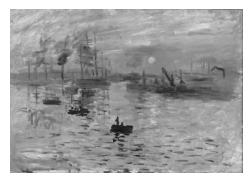

In [54]:
plt.axis('off') # 不显示坐标轴
plt.imshow(rgb2gray_4(test_img), cmap='gray')

In [29]:
# Method 5 PPT references https://ieeexplore.ieee.org/abstract/document/5445596
def rgb2gray_5(img):
    # extract the RGB channels
    R = img[..., 0]
    G = img[..., 1]
    B = img[..., 2]

    # compute Y, U, and V
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    U = (B - Y) * 0.565
    V = (R - Y) * 0.713

    # compute UV
    UV = U + V

    # compute R1, R2, R3, G1, G2, G3, B1, B2, B3
    R1 = R * 0.299
    R2 = R * 0.587
    R3 = R * 0.114
    G1 = G * 0.299
    G2 = G * 0.587
    G3 = G * 0.114
    B1 = B * 0.299
    B2 = B * 0.587
    B3 = B * 0.114

    # compute R4, G4, B4
    R4 = (R1 + R2 + R3) / 3
    G4 = (G1 + G2 + G3) / 3
    B4 = (B1 + B2 + B3) / 3

    # compute I1
    I1 = (R4 + G4 + B4 + UV) / 4

    # the output image is I1
    return I1

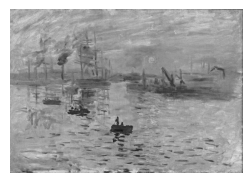

In [30]:
plt.axis('off') # 不显示坐标轴
plt.imshow(rgb2gray_5(test_img), cmap='gray')

In [43]:
def compare_rgb2gray(test_img):
    """compare three methods to convert color image to grey image
    Args:
        test_img (np.ndarray): color image
    """
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))
    axes[0].axis('off')
    axes[0].imshow(test_img)
    axes[0].set_title('Original')
    axes[1].axis('off')
    axes[1].imshow(rgb2gray_1(test_img), cmap='gray')
    axes[1].set_title('Average')
    axes[2].axis('off')
    axes[2].imshow(rgb2gray_2(test_img), cmap='gray')
    axes[2].set_title('Weighted Sum')
    axes[3].axis('off')
    axes[3].imshow(rgb2gray_3(test_img), cmap='gray')
    axes[3].set_title('OpenCV')
    axes[4].axis('off')
    axes[4].imshow(rgb2gray_4(test_img), cmap='gray')
    axes[4].set_title('PCA')
    axes[5].axis('off')
    axes[5].imshow(rgb2gray_5(test_img), cmap='gray')
    axes[5].set_title('Paper ''CI2GIC''')

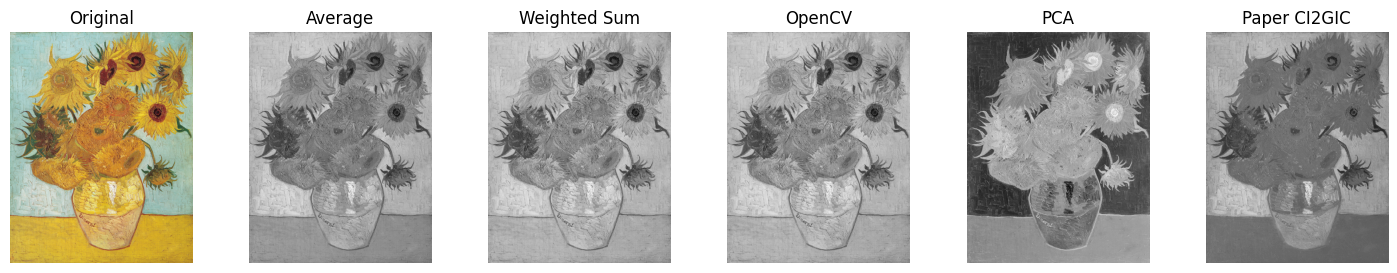

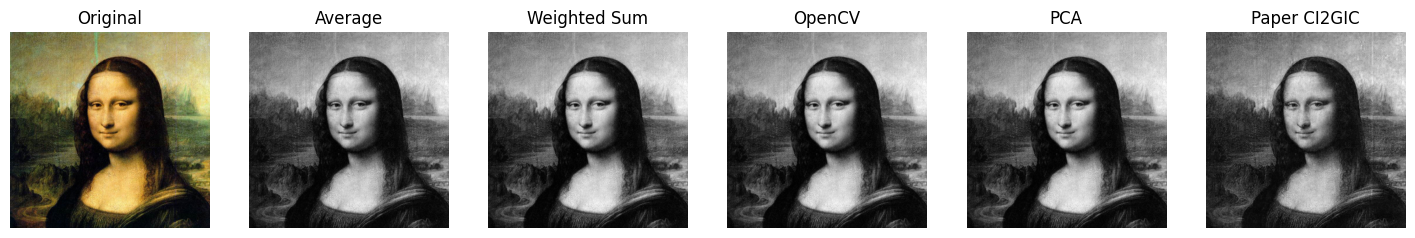

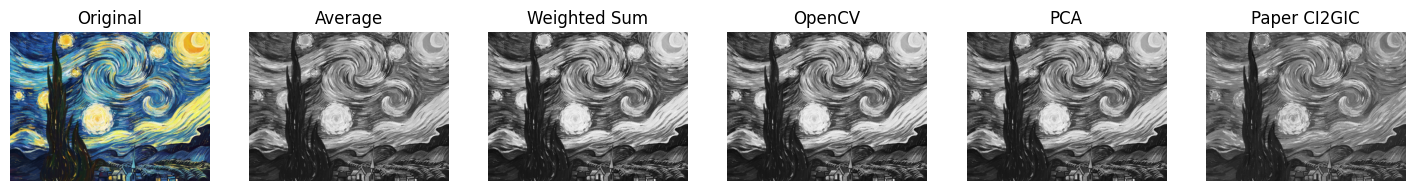

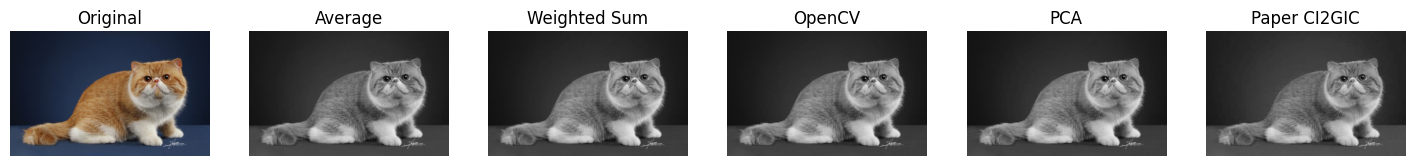

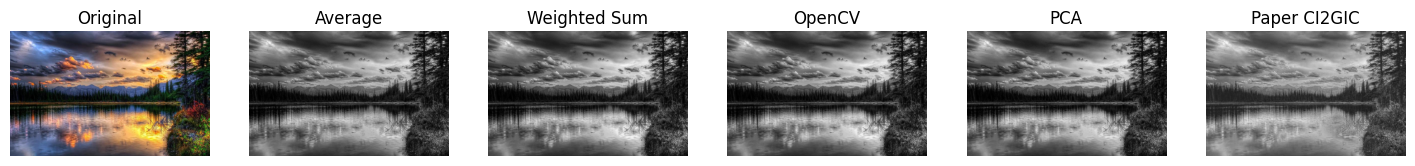

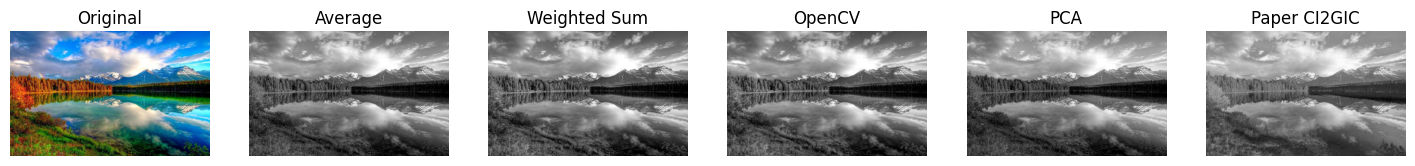

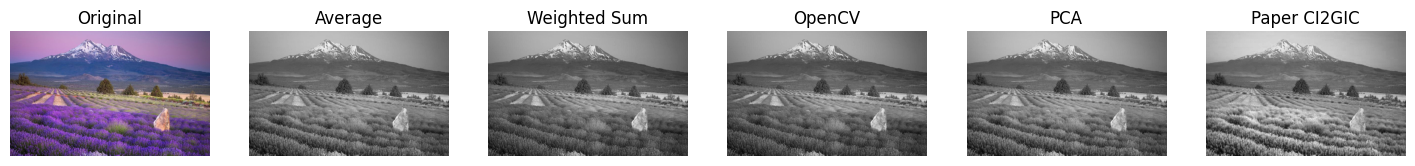

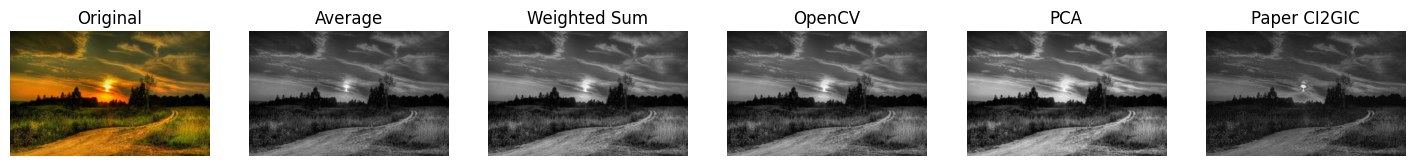

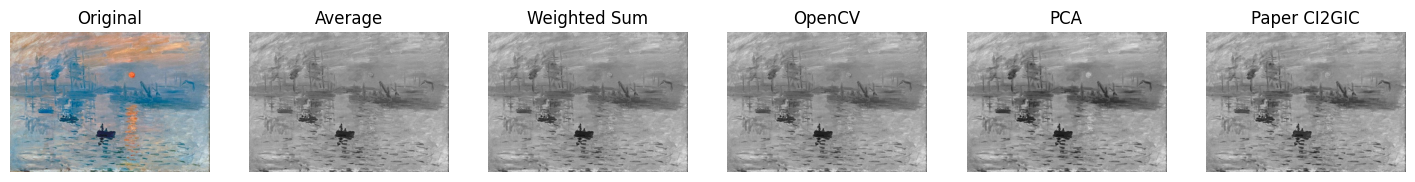

In [44]:
for file_name in os.listdir('./color'):
    if file_name.endswith('.jpg'):
        test_img = load_image(os.path.join('./color', file_name))
        compare_rgb2gray(test_img)
        plt.savefig(os.path.join('./gray', file_name), dpi=300, bbox_inches='tight', pad_inches=0.1)
        plt.show()

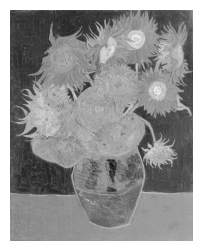

In [58]:
# strange figure 5
plt.axis('off') # 不显示坐标轴
plt.imshow(rgb2gray_4(load_image("./color/sunflower.jpg")), cmap='gray')

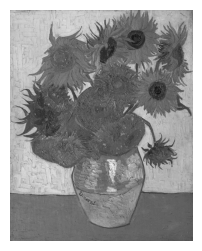

In [59]:
plt.axis('off') # 不显示坐标轴
plt.imshow(rgb2gray_4(-load_image("./color/sunflower.jpg")), cmap='gray')